In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df_2 = pd.read_csv('data/csse_covid_19_daily_reports_us/02-15-2021.csv')

In [3]:
df.head()

,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,...,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,...,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,...,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,...,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,...,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,...,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052


In [4]:
df_2

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-02-16 05:31:00,32.3182,-86.9023,481605,9244,264621.0,207740.0,1.0,9822.288982,2231641.0,NaN,1.919415,84000001.0,USA,45514.109706,NaN
1,Alaska,US,2021-02-16 05:31:00,61.3707,-152.4044,56405,282,NaN,56123.0,2.0,7710.393756,1584548.0,NaN,0.499956,84000002.0,USA,216602.943086,NaN
2,American Samoa,US,2021-02-16 05:31:00,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-02-16 05:31:00,33.7298,-111.4312,798608,14978,112062.0,671568.0,4.0,10971.823743,3636676.0,NaN,1.875513,84000004.0,USA,49963.145978,NaN
4,Arkansas,US,2021-02-16 05:31:00,34.9697,-92.3731,313348,5275,297552.0,10521.0,5.0,10383.311839,2587306.0,NaN,1.683432,84000005.0,USA,85734.726311,NaN
5,California,US,2021-02-16 08:31:10,36.1162,-119.6816,3491392,47119,NaN,3444273.0,6.0,8836.232778,45964127.0,NaN,1.349576,84000006.0,USA,116328.881319,NaN
6,Colorado,US,2021-02-16 05:31:00,39.0598,-105.3111,414369,5826,21970.0,386573.0,8.0,7195.485259,5861313.0,NaN,1.405993,84000008.0,USA,101781.241578,NaN
7,Connecticut,US,2021-02-16 05:31:00,41.5978,-72.7554,270242,7447,9800.0,252995.0,9.0,7579.810545,6312225.0,NaN,2.755678,84000009.0,USA,177046.756685,NaN
8,Delaware,US,2021-02-16 05:31:00,39.3185,-75.5071,83239,1283,NaN,81956.0,10.0,8548.169782,1323091.0,NaN,1.541345,84000010.0,USA,135873.887307,NaN
9,Diamond Princess,US,2021-02-16 05:31:00,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


In [5]:
dmf=df.merge(df_2, left_on='Name', right_on='Province_State')
dmf

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,...,Active,FIPS_y,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,...,207740.0,1.0,9822.288982,2231641.0,NaN,1.919415,84000001.0,USA,45514.109706,NaN
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,...,56123.0,2.0,7710.393756,1584548.0,NaN,0.499956,84000002.0,USA,216602.943086,NaN
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,...,671568.0,4.0,10971.823743,3636676.0,NaN,1.875513,84000004.0,USA,49963.145978,NaN
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,...,10521.0,5.0,10383.311839,2587306.0,NaN,1.683432,84000005.0,USA,85734.726311,NaN
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,...,3444273.0,6.0,8836.232778,45964127.0,NaN,1.349576,84000006.0,USA,116328.881319,NaN
5,8,Colorado,CO,269601,5758736,21.360218,14.7,18.1,50.4,87.3,...,386573.0,8.0,7195.485259,5861313.0,NaN,1.405993,84000008.0,USA,101781.241578,NaN
6,9,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,...,252995.0,9.0,7579.810545,6312225.0,NaN,2.755678,84000009.0,USA,177046.756685,NaN
7,10,Delaware,DE,6446,973764,151.064846,19.5,17.4,48.3,70.5,...,81956.0,10.0,8548.169782,1323091.0,NaN,1.541345,84000010.0,USA,135873.887307,NaN
8,11,District of Columbia,DC,177,705749,3987.282486,12.4,15.9,47.4,45.1,...,10344.0,11.0,5526.185655,1172768.0,NaN,2.512756,84000011.0,USA,166173.526282,NaN
9,12,Florida,FL,170312,21477737,126.108184,20.9,16.4,48.9,77.1,...,1802054.0,12.0,8525.050847,20575446.0,NaN,1.580240,84000012.0,USA,95798.947533,NaN


In [6]:
dmf.columns

Index(['FIPS_x', 'Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS_y',
       'Incident_Rate', 'Total_Test_Results', 'People_Hospitalized',
       'Case_Fatality_Ratio', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

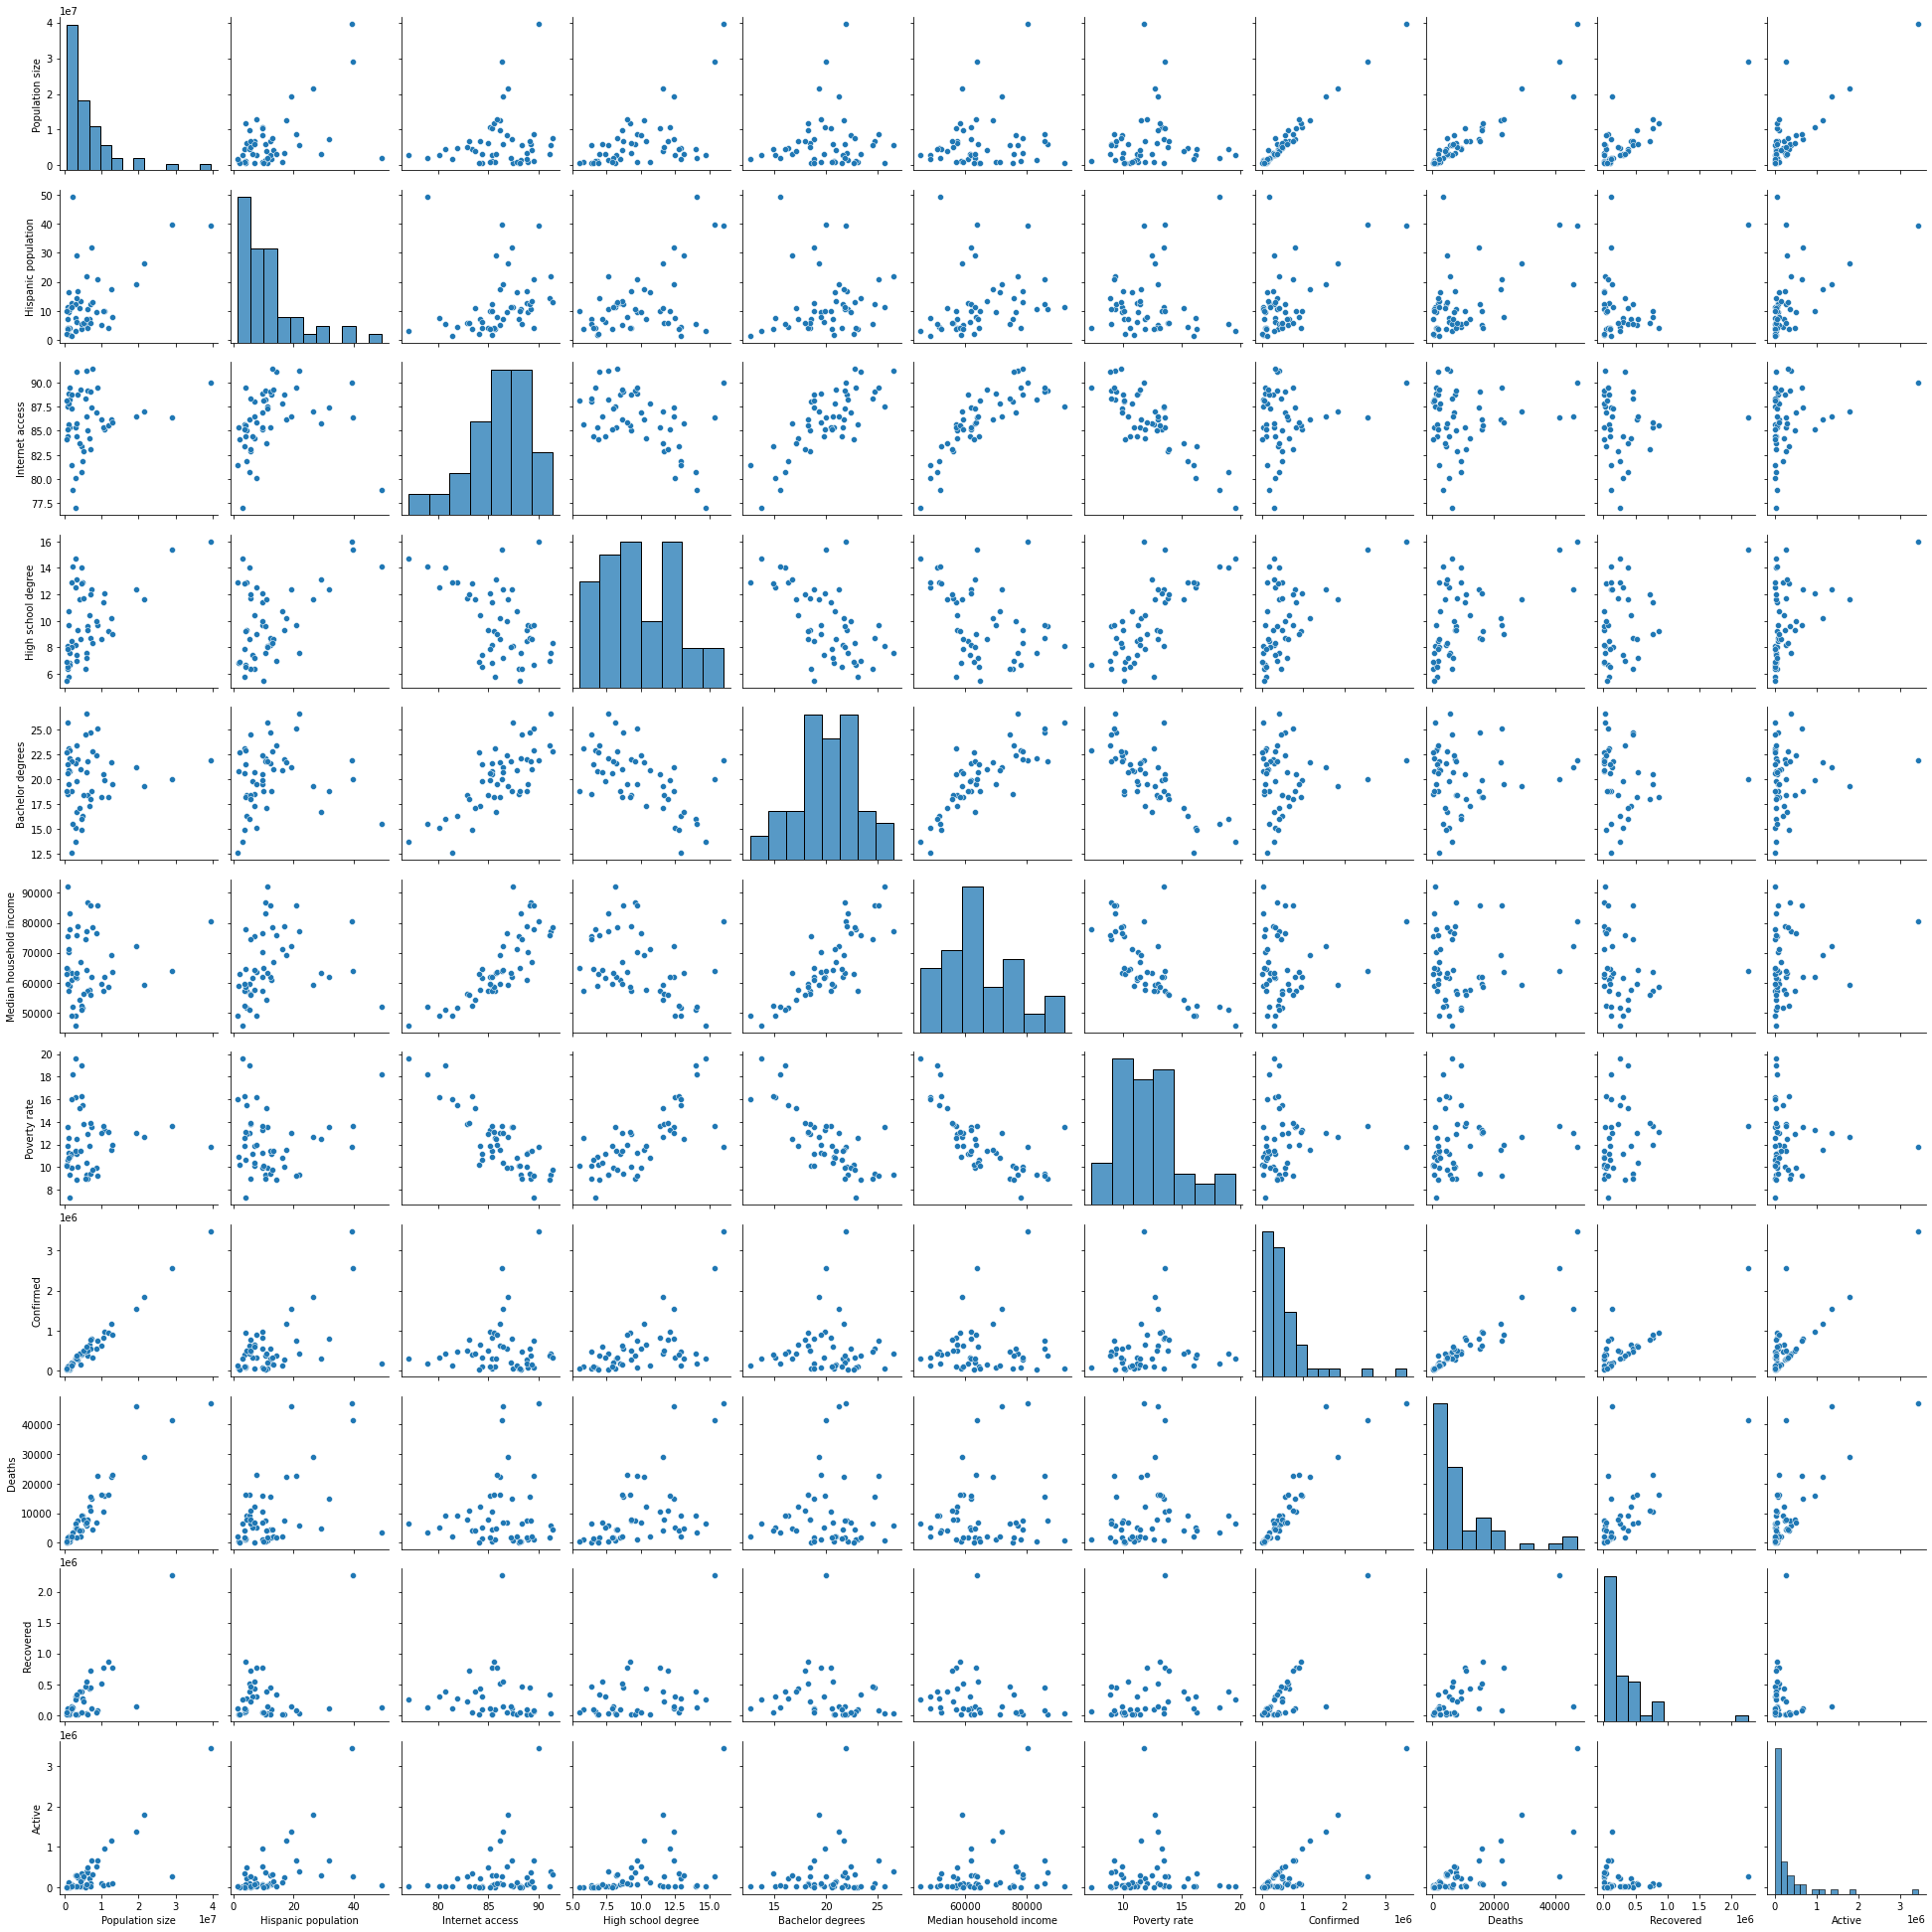

In [7]:
sns.pairplot(dmf[['Name', 'Population size','Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
        'Confirmed', 'Deaths', 'Recovered', 'Active']]);

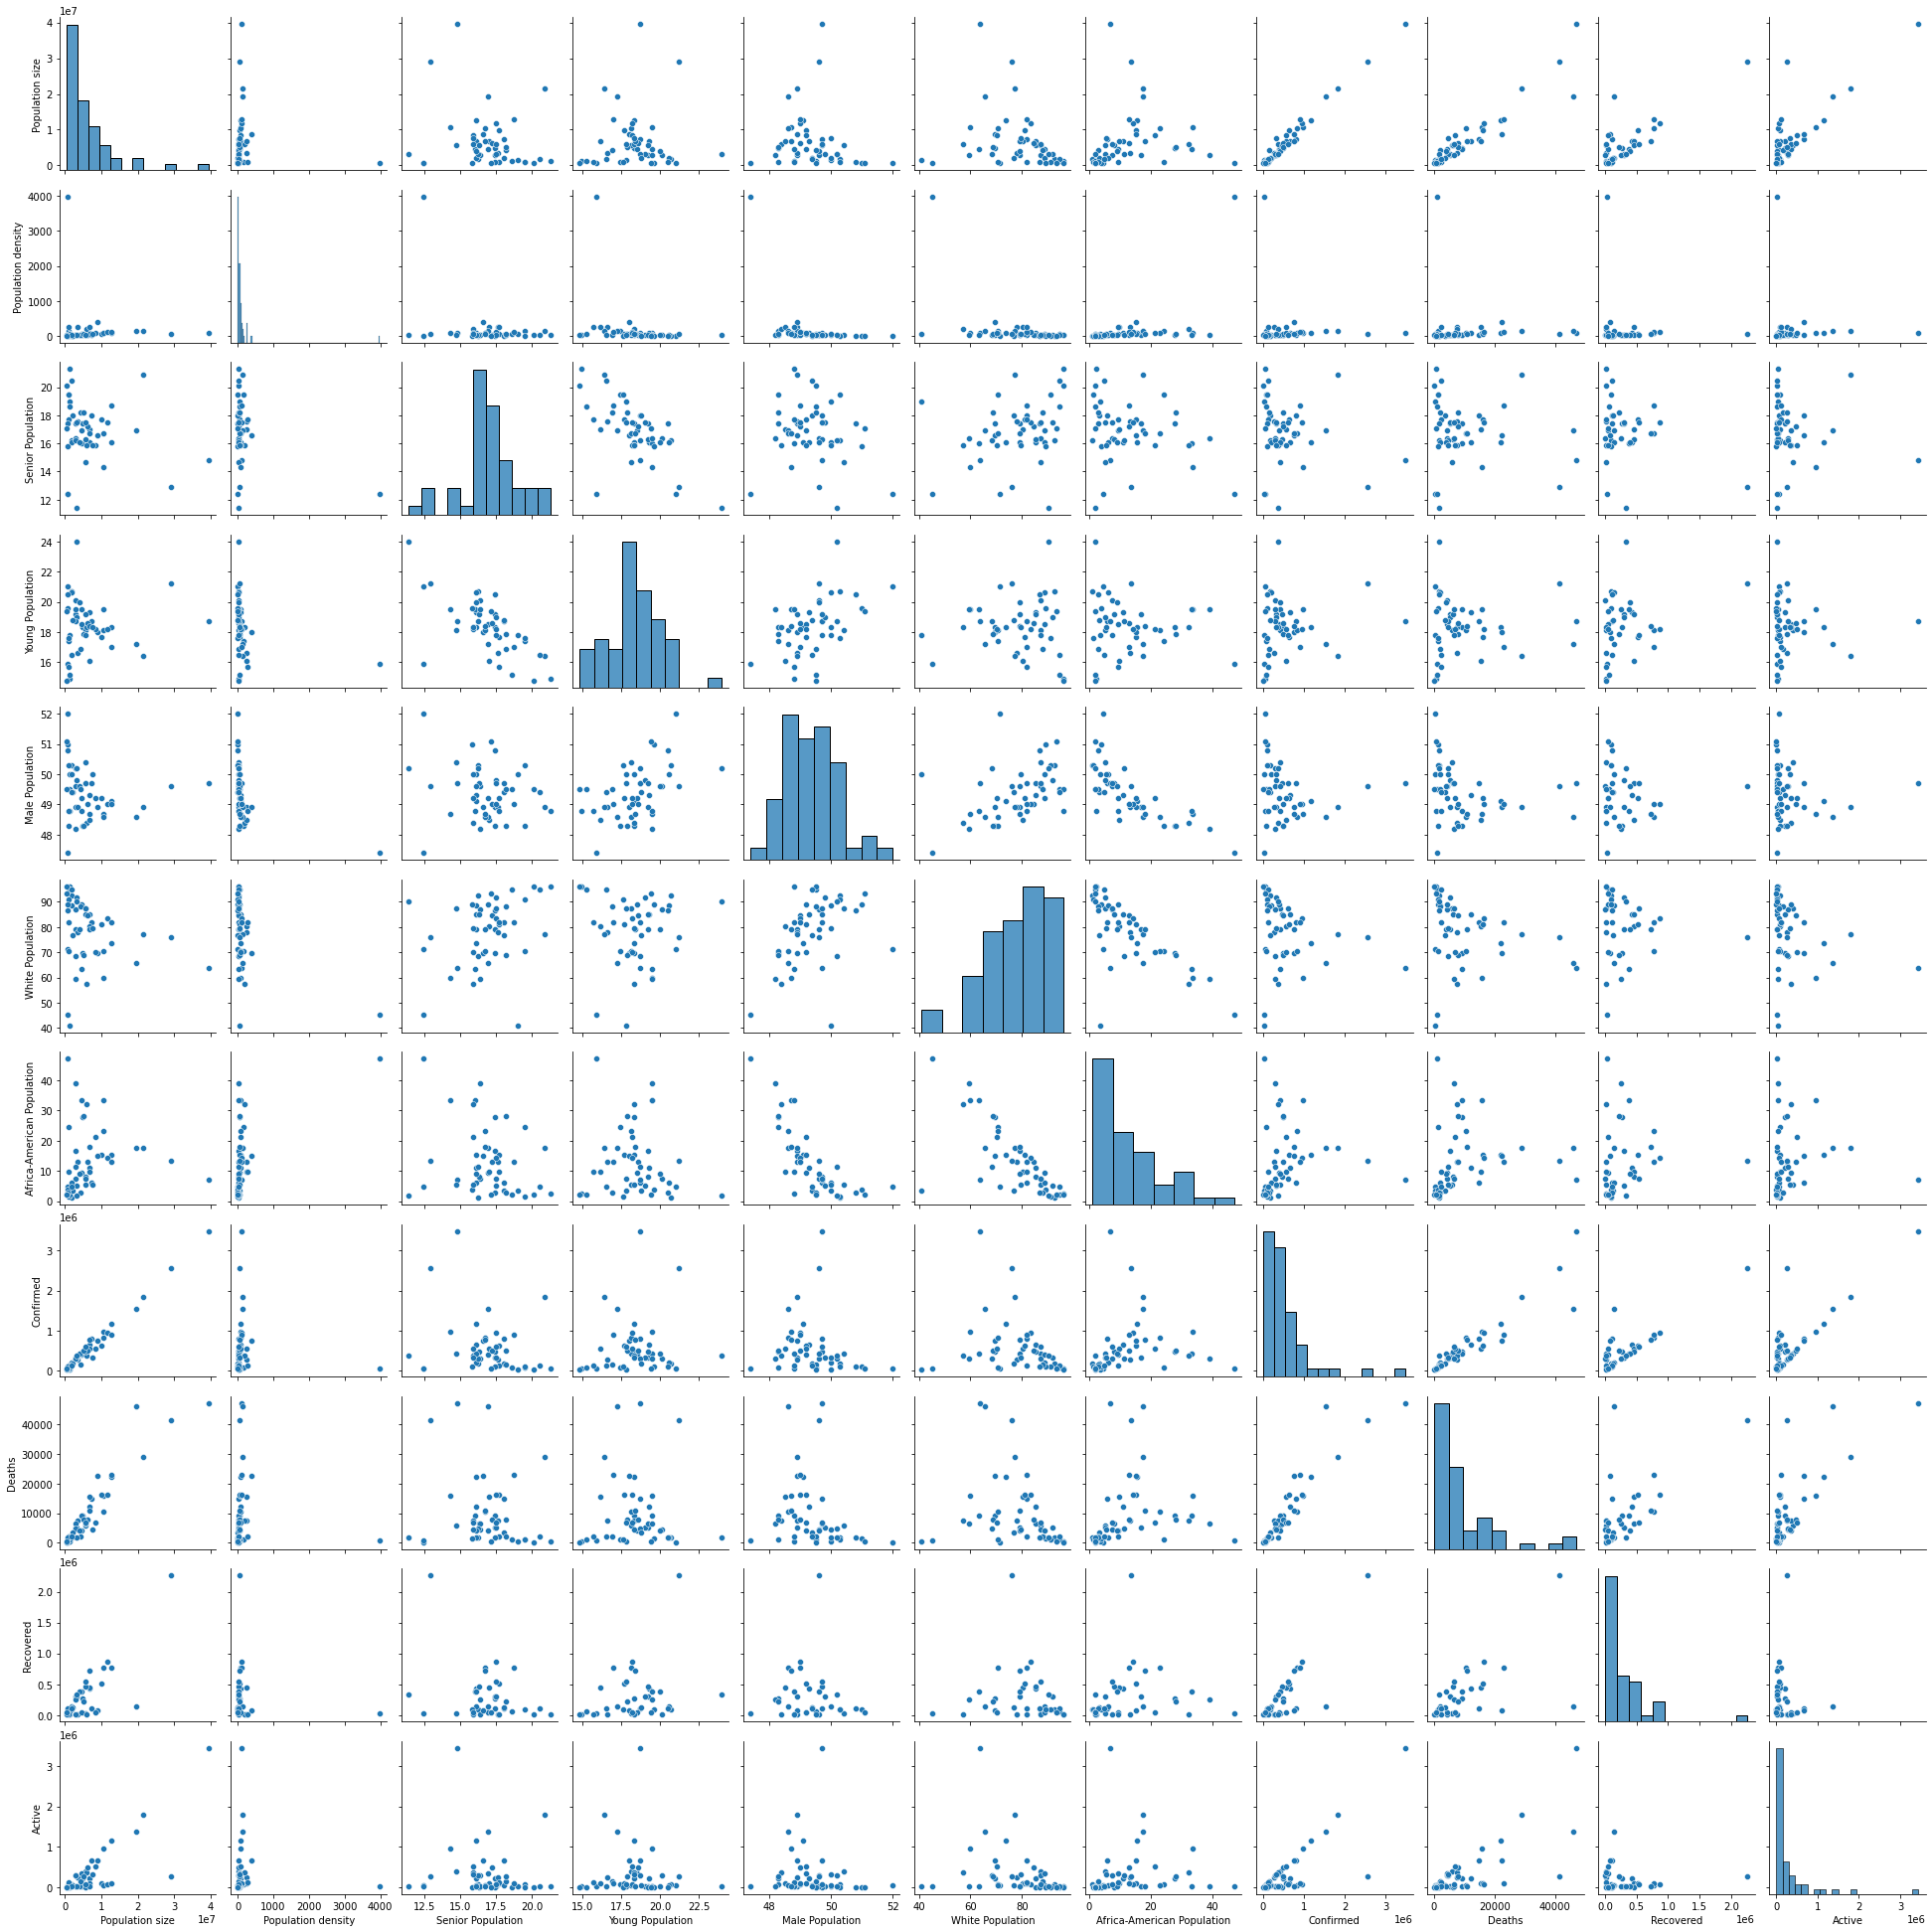

In [23]:
sns.pairplot(dmf[['Name', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
        'Confirmed', 'Deaths', 'Recovered', 'Active']])